# Introduction - Exploratory Analysis

In this notebook, we will conduct an analysis of the data previously prepared in the path: `data/interim/hockey_teams.json`. This file, being partially processed, is easily accessible for import and ready for more detailed analytical examination.

This part of the workshop will focus on utilizing `pandas` and `matplotlib`, which were discussed during the course. The main objective is to familiarize ourselves with the dataset we are working on. Through a series of exercises:  
- we will get to know the structure of the data,  
- we will conduct elementary data exploration (EDA).

## Column Description

Below is a brief description of each column in our dataset:

- **Team Name**: The name of the team participating in the match.
- **Year**: The year in which the season takes place.
- **Wins**: The number of matches won by the team in the given season.
- **Losses**: The number of matches lost by the team in the given season.
- **OT Losses**: The number of matches lost by the team in overtime in the given season.
- **Win %**: The percentage of matches won by the team in the given season.
- **Goals For (GF)**: The number of goals scored by the team in the given season.
- **Goals Against (GA)**: The number of goals conceded by the team in the given season.
- **+ / -**: The difference between the number of goals scored and conceded by the team in the given season.

> Note: At this stage, certain significant simplifications were intentionally made in the analysis and they will not be explicitly mentioned, aiming for a discussion at the end of the workshop.

# Preparation

## Import libraries
Here, load the libraries that will be needed in the following steps

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# Loading the Dataset

We recommend loading the raw data into a variable with the suffix `_raw`. This will avoid the need to reload the data from the beginning in case of an error, which can be a time-consuming process.  
  
> **Tip:** A `json` file can be easily loaded using `pandas` with the `read_json` function - [click](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)  

Load data from the `hockey_teams` file here

In [5]:
df_raw=pd.read_json("../data/interim/hockey_teams.json")

Check here if the data loaded correctly

In [6]:
print(df_raw)

                    name  year  wins  losses ot_losses  win_pct   gf   ga  \
0          Boston Bruins  1990    44      24              0.550  299  264   
1         Buffalo Sabres  1990    31      30              0.388  292  278   
2         Calgary Flames  1990    46      26              0.575  344  263   
3     Chicago Blackhawks  1990    49      23              0.613  284  211   
4      Detroit Red Wings  1990    34      38              0.425  273  298   
..                   ...   ...   ...     ...       ...      ...  ...  ...   
577  Tampa Bay Lightning  2011    38      36         8    0.463  235  281   
578  Toronto Maple Leafs  2011    35      37        10    0.427  231  264   
579    Vancouver Canucks  2011    51      22         9    0.622  249  198   
580  Washington Capitals  2011    42      32         8    0.512  222  230   
581        Winnipeg Jets  2011    37      35        10    0.451  225  246   

     diff  
0      35  
1      14  
2      81  
3      73  
4     -25  
.. 

In [7]:
import json

with open("../data/interim/hockey_teams.json", encoding="utf-8") as f:
    data = json.load(f)

print(type(data))
print(data[:2])  # ukázka prvních dvou záznamů


<class 'list'>
[{'name': 'Boston Bruins', 'year': '1990', 'wins': '44', 'losses': '24', 'ot_losses': '', 'win_pct': '0.55', 'gf': '299', 'ga': '264', 'diff': '35'}, {'name': 'Buffalo Sabres', 'year': '1990', 'wins': '31', 'losses': '30', 'ot_losses': '', 'win_pct': '0.388', 'gf': '292', 'ga': '278', 'diff': '14'}]


# Preliminary Data Transformation

## Standardizing Column Names

Currently, our dataset contains original column names which, from a technical standpoint, should not contain spaces or other special characters.

In this section, we will standardize and simplify the naming conventions to facilitate data processing in subsequent stages. We will apply the following column name mapping:

- **Team Name** -> `team`
- **Year** -> `season`
- **Wins** -> `victories`
- **Losses** -> `defeats`
- **OT Losses** -> `overtime_defeats`
- **Win %** -> `victory_percentage`
- **Goals For (GF)** -> `scored_goals`
- **Goals Against (GA)** -> `received_goals`
- **\+ / -** -> `goal_difference`

> At this point, we recommend creating a new DataFrame without the `_raw` postfix. For example, if the data was loaded into the variable `df_raw`, we now want to work with the variable `df`, where we will modify the column names.

In [8]:
df_raw.columns = ["team", "season", "victories", "defeats", "overtime_defeats", "victory_percentage", "scored_goals", "received_goals", "goal_difference"]

In [9]:
df_raw

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
0,Boston Bruins,1990,44,24,,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9,0.622,249,198,51
580,Washington Capitals,2011,42,32,8,0.512,222,230,-8


In [11]:
df=df_raw.copy()
df


,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
0,Boston Bruins,1990,44,24,,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9,0.622,249,198,51
580,Washington Capitals,2011,42,32,8,0.512,222,230,-8


## Removing Empty Values

As can be observed, the `overtime_defeats` column contains many empty values, and the expected data type is `int`. Before proceeding with further analysis, this column needs to be properly prepared.

To achieve this, we will perform the following steps:
- Check which symbol is used as an indicator of an empty field.
- Fill the empty fields with a value of 0.
- Then convert the data type of this column to `int`.

By following these steps, the `overtime_defeats` column will be ready for further analysis.

### Finding the Indicator of an Empty Field

In [12]:
print(df["overtime_defeats"].unique())

['' '3' '4' '6' '5' '0' '2' '1' '8' '7' '9' '12' '16' '11' '13' '14' '15'
 '10' '18']


### Overwriting Empty Values with 0

In [13]:
df.replace('', 0, inplace=True)
df

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
0,Boston Bruins,1990,44,24,0,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,0,0.388,292,278,14
2,Calgary Flames,1990,46,26,0,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,0,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,0,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9,0.622,249,198,51
580,Washington Capitals,2011,42,32,8,0.512,222,230,-8


In [13]:
missing_overtime = df[df["overtime_defeats"].isna()]
print(missing_overtime)

Empty DataFrame
Columns: [team, season, victories, defeats, overtime_defeats, victory_percentage, scored_goals, received_goals, goal_difference]
Index: []


### Column Type Conversion

In [23]:
df["overtime_defeats"] = pd.to_numeric(df["overtime_defeats"], errors="coerce")
df["season"] = pd.to_numeric(df["season"], errors="coerce")
df["victories"] = pd.to_numeric(df["victories"], errors="coerce")
df["defeats"] = pd.to_numeric(df["defeats"], errors="coerce")
df["victory_percentage"] = pd.to_numeric(df["victory_percentage"], errors="coerce")
df["scored_goals"] = pd.to_numeric(df["scored_goals"], errors="coerce")
df["received_goals"] = pd.to_numeric(df["received_goals"], errors="coerce")
df["goal_difference"] = pd.to_numeric(df["goal_difference"], errors="coerce")
                                  
df

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8.0,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10.0,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9.0,0.622,249,198,51
580,Washington Capitals,2011,42,32,8.0,0.512,222,230,-8


# Dataset Analysis

In this section, we will focus on answering fundamental questions about our dataset in the context of hockey games. The goal is to become familiar with the dataset and develop an intuition about it.  
  
Here is a list of exercises we will perform to find answers to key questions:  
  
- How many teams have participated in league games over the years?  
- What is the total number of available seasons?  
- What is the time span of the data?  
- Are there any suspicious or outlier values in the numerical columns?  
  
These exercises will help us better understand the structure and nature of our data.  

### Number of teams that participated in league matches

Here, indicate the total number of teams available in our dataset

In [15]:
df ["team"].unique()

array(['Boston Bruins', 'Buffalo Sabres', 'Calgary Flames',
       'Chicago Blackhawks', 'Detroit Red Wings', 'Edmonton Oilers',
       'Hartford Whalers', 'Los Angeles Kings', 'Minnesota North Stars',
       'Montreal Canadiens', 'New Jersey Devils', 'New York Islanders',
       'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins',
       'Quebec Nordiques', 'St. Louis Blues', 'Toronto Maple Leafs',
       'Vancouver Canucks', 'Washington Capitals', 'Winnipeg Jets',
       'San Jose Sharks', 'Ottawa Senators', 'Tampa Bay Lightning',
       'Mighty Ducks of Anaheim', 'Dallas Stars', 'Florida Panthers',
       'Colorado Avalanche', 'Phoenix Coyotes', 'Carolina Hurricanes',
       'Nashville Predators', 'Atlanta Thrashers',
       'Columbus Blue Jackets', 'Minnesota Wild', 'Anaheim Ducks'],
      dtype=object)

In [16]:
df["team"].nunique()

35

### Total number of seasons

Here, indicate the total number of seasons.

In [17]:
df["season"].nunique()

21

### Time Span of Data

Here, we will examine the availability of data for individual seasons. The analysis will be conducted in two stages:  
- First, we will determine the time range of the data by identifying the start year (`start_year`) and the end year (`end_year`). This will allow us to establish for which seasons we have information.  
- Next, we will look for any gaps in the time data to ensure that we have a complete set of information for each season.   

At this point, we will determine the start year and end year of the data:

In [18]:
# determine the start year and end year of the data:
start_year=df["season"].min()
end_year = df["season"].max()
print(start_year, end_year)

1990 2011


Here, we will check if data is present for each year within the determined range:

In [ ]:
#Creating a list of all years: 

In [14]:
all_years = list(range(df["season"].min(), df["season"].max() + 1))
print(all_years)


[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


In [ ]:
#Creating a list of years without missing values: 

In [16]:
present_years = sorted(df["season"].dropna().unique())
present_years


[np.int64(1990),
 np.int64(1991),
 np.int64(1992),
 np.int64(1993),
 np.int64(1994),
 np.int64(1995),
 np.int64(1996),
 np.int64(1997),
 np.int64(1998),
 np.int64(1999),
 np.int64(2000),
 np.int64(2001),
 np.int64(2002),
 np.int64(2003),
 np.int64(2005),
 np.int64(2006),
 np.int64(2007),
 np.int64(2008),
 np.int64(2009),
 np.int64(2010),
 np.int64(2011)]

In [20]:
missing_years = [year for year in all_years if year not in present_years]
print("Missing seasons:", missing_years)

Missing seasons: [2004]


### Analysis of Numerical Columns

Here we will examine the basic descriptive statistics for numerical columns.

To this end, describe and analyze the results for the following columns:

- victories
- defeats
- overtime_defeats
- victory_percentage
- scored_goals
- received_goals
- goal_difference

We are interested in the following statistics:
- mean,
- count,
- standard deviation,
- percentiles = `[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]`

In [24]:
print(df[columns_to_analyze].dtypes)

victories               int64
defeats                 int64
overtime_defeats      float64
victory_percentage    float64
scored_goals            int64
received_goals          int64
goal_difference         int64
dtype: object


In [29]:
print(df["team"].value_counts())

team
Boston Bruins              21
Buffalo Sabres             21
Calgary Flames             21
Chicago Blackhawks         21
Detroit Red Wings          21
Edmonton Oilers            21
Los Angeles Kings          21
New Jersey Devils          21
Montreal Canadiens         21
New York Rangers           21
New York Islanders         21
St. Louis Blues            21
Toronto Maple Leafs        21
Philadelphia Flyers        21
Pittsburgh Penguins        21
Vancouver Canucks          21
Washington Capitals        21
San Jose Sharks            20
Ottawa Senators            19
Tampa Bay Lightning        19
Florida Panthers           18
Dallas Stars               18
Colorado Avalanche         16
Phoenix Coyotes            15
Carolina Hurricanes        14
Nashville Predators        13
Mighty Ducks of Anaheim    12
Minnesota Wild             11
Columbus Blue Jackets      11
Atlanta Thrashers          11
Hartford Whalers            7
Winnipeg Jets               7
Anaheim Ducks               6
Quebe

In [34]:
for col in columns_to_analyze:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [35]:
columns_to_analyze = [
    "victories",
    "defeats",
    "overtime_defeats",
    "victory_percentage",
    "scored_goals",
    "received_goals",
    "goal_difference"
]

percentiles = [0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]

grouped = df.groupby("team")[columns_to_analyze]

basic_stats = grouped.agg(["count", "mean", "std"])
basic_stats



victories                       defeats             \
                            count       mean        std   count       mean   
team                                                                         
Anaheim Ducks                   6  42.833333   5.564770       6  29.666667   
Atlanta Thrashers              11  31.090909   8.915767      11  39.727273   
Boston Bruins                  21  38.857143   7.837638      21  29.238095   
Buffalo Sabres                 21  38.238095   7.489358      21  30.857143   
Calgary Flames                 21  36.380952   7.214404      21  32.142857   
Carolina Hurricanes            14  36.785714   7.329378      14  32.928571   
Chicago Blackhawks             21  36.428571   8.834995      21  32.142857   
Colorado Avalanche             16  42.312500   5.498106      16  28.875000   
Columbus Blue Jackets          11  31.090909   5.224070      11  40.090909   
Dallas Stars                   18  41.777778   9.045997      18  27.055556   
Detroit Red Wings              21  46.952381   6.859127      21  22.857143   
Edmonton Oilers                21  32.952381   6.127611      21  36.095238   
Florida Panthers               18  31.833333   7.253802      18  33.611111   
Hartford Whalers                7  27.857143   5.014265       7  40.142857   
Los Angeles Kings              21  34.761905   7.879751      21  33.666667   
Mighty Ducks of Anaheim        12  31.750000   7.275426      12  35.583333   
Minnesota North Stars           3  31.666667   4.509250       3  39.666667   
Minnesota Wild                 11  36.818182   7.263858      11  32.909091   
Montreal Canadiens             21  37.285714   7.043741      21  31.761905   
Nashville Predators            13  38.692308   8.901167      13  32.615385   
New Jersey Devils              21  43.095238   6.811055      21  26.857143   
New York Islanders             21  30.952381   7.221331      21  39.000000   
New York Rangers               21  37.714286   8.313500      21  32.285714   
Ottawa Senators                19  35.736842  13.625312      19  34.263158   
Philadelphia Flyers            21  39.809524   6.675470      21  28.476190   
Phoenix Coyotes                15  37.133333   6.300416      15  33.200000   
Pittsburgh Penguins            21  39.952381   9.478798      21  30.571429   
Quebec Nordiques                5  29.400000  12.239281       5  36.000000   
San Jose Sharks                20  36.050000  12.584347      20  33.600000   
St. Louis Blues                21  38.619048   6.946051      21  29.809524   
Tampa Bay Lightning            19  30.947368   9.874061      19  38.526316   
Toronto Maple Leafs            21  36.523810   7.256852      21  33.095238   
Vancouver Canucks              21  38.809524   9.760221      21  30.571429   
Washington Capitals            21  38.380952   8.381385      21  31.523810   
Winnipeg Jets                   7  30.285714   8.577379       7  37.571429   

                                   overtime_defeats                       \
                               std            count       mean       std   
team                                                                       
Anaheim Ducks             5.609516                6   9.500000  3.391165   
Atlanta Thrashers         7.862454               11   7.090909  3.618136   
Boston Bruins             6.941936               12   8.833333  3.713203   
Buffalo Sabres            5.275279               12   6.916667  3.752777   
Calgary Flames            5.893095               12   7.833333  4.217568   
Carolina Hurricanes       5.398921               12   7.166667  4.041452   
Chicago Blackhawks        7.578164               12   7.666667  3.676296   
Colorado Avalanche        7.736278               12   6.000000  2.763397   
Columbus Blue Jackets     5.243177               11   7.818182  4.069845   
Dallas Stars              6.130658               12   6.666667  3.676296   
Detroit Red Wings         6.318906               12   7.000000  4.06761

In [36]:
print(df[["team", "season", "victories", "defeats"]].head(30))

                     team  season  victories  defeats
0           Boston Bruins    1990         44       24
1          Buffalo Sabres    1990         31       30
2          Calgary Flames    1990         46       26
3      Chicago Blackhawks    1990         49       23
4       Detroit Red Wings    1990         34       38
5         Edmonton Oilers    1990         37       37
6        Hartford Whalers    1990         31       38
7       Los Angeles Kings    1990         46       24
8   Minnesota North Stars    1990         27       39
9      Montreal Canadiens    1990         39       30
10      New Jersey Devils    1990         32       33
11     New York Islanders    1990         25       45
12       New York Rangers    1990         36       31
13    Philadelphia Flyers    1990         33       37
14    Pittsburgh Penguins    1990         41       33
15       Quebec Nordiques    1990         16       50
16        St. Louis Blues    1990         47       22
17    Toronto Maple Leafs   

In [48]:
grouped = df.groupby("team")[columns_to_analyze]
basic_stats = grouped.agg(["count", "mean", "std"])
basic_stats

victories                       defeats             \
                            count       mean        std   count       mean   
team                                                                         
Anaheim Ducks                   6  42.833333   5.564770       6  29.666667   
Atlanta Thrashers              11  31.090909   8.915767      11  39.727273   
Boston Bruins                  21  38.857143   7.837638      21  29.238095   
Buffalo Sabres                 21  38.238095   7.489358      21  30.857143   
Calgary Flames                 21  36.380952   7.214404      21  32.142857   
Carolina Hurricanes            14  36.785714   7.329378      14  32.928571   
Chicago Blackhawks             21  36.428571   8.834995      21  32.142857   
Colorado Avalanche             16  42.312500   5.498106      16  28.875000   
Columbus Blue Jackets          11  31.090909   5.224070      11  40.090909   
Dallas Stars                   18  41.777778   9.045997      18  27.055556   
Detroit Red Wings              21  46.952381   6.859127      21  22.857143   
Edmonton Oilers                21  32.952381   6.127611      21  36.095238   
Florida Panthers               18  31.833333   7.253802      18  33.611111   
Hartford Whalers                7  27.857143   5.014265       7  40.142857   
Los Angeles Kings              21  34.761905   7.879751      21  33.666667   
Mighty Ducks of Anaheim        12  31.750000   7.275426      12  35.583333   
Minnesota North Stars           3  31.666667   4.509250       3  39.666667   
Minnesota Wild                 11  36.818182   7.263858      11  32.909091   
Montreal Canadiens             21  37.285714   7.043741      21  31.761905   
Nashville Predators            13  38.692308   8.901167      13  32.615385   
New Jersey Devils              21  43.095238   6.811055      21  26.857143   
New York Islanders             21  30.952381   7.221331      21  39.000000   
New York Rangers               21  37.714286   8.313500      21  32.285714   
Ottawa Senators                19  35.736842  13.625312      19  34.263158   
Philadelphia Flyers            21  39.809524   6.675470      21  28.476190   
Phoenix Coyotes                15  37.133333   6.300416      15  33.200000   
Pittsburgh Penguins            21  39.952381   9.478798      21  30.571429   
Quebec Nordiques                5  29.400000  12.239281       5  36.000000   
San Jose Sharks                20  36.050000  12.584347      20  33.600000   
St. Louis Blues                21  38.619048   6.946051      21  29.809524   
Tampa Bay Lightning            19  30.947368   9.874061      19  38.526316   
Toronto Maple Leafs            21  36.523810   7.256852      21  33.095238   
Vancouver Canucks              21  38.809524   9.760221      21  30.571429   
Washington Capitals            21  38.380952   8.381385      21  31.523810   
Winnipeg Jets                   7  30.285714   8.577379       7  37.571429   

                                   overtime_defeats                       \
                               std            count       mean       std   
team                                                                       
Anaheim Ducks             5.609516                6   9.500000  3.391165   
Atlanta Thrashers         7.862454               11   7.090909  3.618136   
Boston Bruins             6.941936               12   8.833333  3.713203   
Buffalo Sabres            5.275279               12   6.916667  3.752777   
Calgary Flames            5.893095               12   7.833333  4.217568   
Carolina Hurricanes       5.398921               12   7.166667  4.041452   
Chicago Blackhawks        7.578164               12   7.666667  3.676296   
Colorado Avalanche        7.736278               12   6.000000  2.763397   
Columbus Blue Jackets     5.243177               11   7.818182  4.069845   
Dallas Stars              6.130658               12   6.666667  3.676296   
Detroit Red Wings         6.318906               12   7.000000  4.06761

In [49]:
def compute_percentiles(group):
    return group.quantile(percentiles).unstack()

percentile_stats = df.groupby("team")[columns_to_analyze].apply(compute_percentiles)
percentile_stats

victories                                         \
                             0.00   0.05  0.10   0.25  0.50   0.75  0.90   
team                                                                       
Anaheim Ducks                34.0  35.25  36.5  39.75  44.5  47.00  47.5   
Atlanta Thrashers            14.0  16.50  19.0  27.00  34.0  35.00  41.0   
Boston Bruins                24.0  26.00  27.0  36.00  39.0  43.00  49.0   
Buffalo Sabres               22.0  27.00  31.0  35.00  38.0  43.00  46.0   
Calgary Flames               24.0  26.00  27.0  31.00  37.0  42.00  46.0   
Carolina Hurricanes          22.0  25.90  29.5  33.25  36.0  40.00  44.4   
Chicago Blackhawks           20.0  24.00  26.0  30.00  36.0  44.00  47.0   
Colorado Avalanche           30.0  31.50  35.5  40.75  43.0  44.25  48.0   
Columbus Blue Jackets        22.0  23.50  25.0  28.50  32.0  34.00  35.0   
Dallas Stars                 17.0  24.65  33.0  38.00  42.5  48.00  50.3   
Detroit Red Wings            33.0  34.00  38.0  44.00  48.0  50.00  54.0   
Edmonton Oilers              17.0  25.00  25.0  30.00  35.0  37.00  39.0   
Florida Panthers             20.0  21.70  22.0  25.00  32.5  37.75  41.0   
Hartford Whalers             19.0  21.10  23.2  26.00  27.0  31.50  32.8   
Los Angeles Kings            16.0  24.00  27.0  28.00  35.0  40.00  46.0   
Mighty Ducks of Anaheim      16.0  20.95  25.1  28.25  33.5  35.25  39.6   
Minnesota North Stars        27.0  27.50  28.0  29.50  32.0  34.00  35.2   
Minnesota Wild               25.0  25.50  26.0  32.50  38.0  41.00  44.0   
Montreal Canadiens           18.0  28.00  30.0  32.00  39.0  41.00  44.0   
Nashville Predators          27.0  27.60  28.0  28.00  40.0  47.00  48.8   
New Jersey Devils            22.0  32.00  37.0  40.00  46.0  48.00  48.0   
New York Islanders           15.0  21.00  22.0  25.00  34.0  36.00  40.0   
New York Rangers             22.0  25.00  27.0  33.00  38.0  43.00  50.0   
Ottawa Senators               9.0   9.90  13.2  31.50  41.0  44.00  48.8   
Philadelphia Flyers          22.0  28.00  32.0  36.00  42.0  45.00  45.0   
Phoenix Coyotes              22.0  28.30  31.0  35.00  38.0  39.50  42.6   
Pittsburgh Penguins          22.0  23.00  27.0  37.00  41.0  47.00  49.0   
Quebec Nordiques             16.0  16.80  17.6  20.00  30.0  34.00  41.8   
San Jose Sharks              11.0  16.70  18.8  27.75  37.5  45.00  51.0   
St. Louis Blues              21.0  28.00  32.0  36.00  39.0  43.00  47.0   
Tampa Bay Lightning          17.0  17.00  18.6  23.50  31.0  38.00  44.4   
Toronto Maple Leafs          21.0  23.00  30.0  30.00  37.0  43.00  45.0   
Vancouver Canucks            18.0  23.00  25.0  32.00  42.0  45.00  49.0   
Washington Capitals          22.0  23.00  28.0  33.00  39.0  43.00  48.0   
Winnipeg Jets                16.0  18.40  20.8  25.00  33.0  36.50  38.2   

                                     defeats  ... received_goals  \
                          0.95  1.00    0.00  ...           1.00   
team                                          ...                  
Anaheim Ducks            47.75  48.0    20.0  ...          251.0   
Atlanta Thrashers        42.00  43.0    28.0  ...          313.0   
Boston Bruins            51.00  53.0    18.0  ...          300.0   
Buffalo Sabres           52.00  53.0    19.0  ...          299.0   
Calgary Flames           46.00  46.0    17.0  ...          305.0   
Carolina Hurricanes      47.45  52.0    22.0  ...          260.0   
Chicago Blackhawks       49.00  52.0    19.0  ...          285.0   
Colorado Avalanche       49.75  52.0    16.0  ...          288.0   
Columbus Blue Jackets    38.00  41.0    31.0  ...          279.0   
Dallas Stars             51.30  53.0    17.0  ...          280.0   
Detroit Red Wings        58.00  62.0    11.0  ...          298.0   
Edmonton Oilers          41.00  41.0    26.0  ...          337.0   
Florida Panthers         41.30  43.0    22.0  ...          257.0   
Hartford Whalers         33.40  34.0    24.0  .

# `team`

In this section, we will conduct a series of analyses on individual teams participating in the leagues. This will allow us to identify the teams that have performed best in the competitions over the years.


## Analysis of Team Participation in League Seasons
Let's perform the following exercises:

- Check how many teams have participated in all seasons of the selected league.
- Display the list of these teams.

In [51]:
df["team"].nunique()

35

List of teams that participated in all seasons of hockey competitions:

In [52]:
teams = df["team"].dropna().unique()
print(sorted(teams))

['Anaheim Ducks', 'Atlanta Thrashers', 'Boston Bruins', 'Buffalo Sabres', 'Calgary Flames', 'Carolina Hurricanes', 'Chicago Blackhawks', 'Colorado Avalanche', 'Columbus Blue Jackets', 'Dallas Stars', 'Detroit Red Wings', 'Edmonton Oilers', 'Florida Panthers', 'Hartford Whalers', 'Los Angeles Kings', 'Mighty Ducks of Anaheim', 'Minnesota North Stars', 'Minnesota Wild', 'Montreal Canadiens', 'Nashville Predators', 'New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Ottawa Senators', 'Philadelphia Flyers', 'Phoenix Coyotes', 'Pittsburgh Penguins', 'Quebec Nordiques', 'San Jose Sharks', 'St. Louis Blues', 'Tampa Bay Lightning', 'Toronto Maple Leafs', 'Vancouver Canucks', 'Washington Capitals', 'Winnipeg Jets']


The number of teams that have played in all seasons:

In [53]:
# 1. Get the full set of seasons
all_seasons = set(df["season"].dropna().unique())

# 2. Group by team and collect the seasons each team has played
team_seasons = df.groupby("team")["season"].apply(set)

# 3. Filter teams that have played in all seasons
teams_in_all_seasons = team_seasons[team_seasons.apply(lambda s: all_seasons.issubset(s))]

# 4. Count them
print("Počet týmů, které hrály ve všech sezónách:", len(teams_in_all_seasons))

Počet týmů, které hrály ve všech sezónách: 17


## Best Performing Teams in League History

Let's list the five best teams with the highest average `victory_percentage` over all years, presenting the data broken down by individual teams and seasons.

In [54]:
#✅ Step 1: Calculate average victory percentage per team

team_avg = df.groupby("team")["victory_percentage"].mean()
top_5_teams = team_avg.sort_values(ascending=False).head(5)

In [55]:
top_teams_df = df[df["team"].isin(top_5_teams.index)]

In [57]:
top_teams_summary = top_teams_df[["team", "season", "victory_percentage"]].sort_values(by=["team", "season"])
print(top_teams_summary)

                  team  season  victory_percentage
402      Anaheim Ducks    2006               0.585
432      Anaheim Ducks    2007               0.573
462      Anaheim Ducks    2008               0.512
492      Anaheim Ducks    2009               0.476
522      Anaheim Ducks    2010               0.573
..                 ...     ...                 ...
449  New Jersey Devils    2007               0.561
479  New Jersey Devils    2008               0.622
509  New Jersey Devils    2009               0.585
539  New Jersey Devils    2010               0.463
568  New Jersey Devils    2011               0.585

[82 rows x 3 columns]


In [60]:
team_ranking = (
    df.groupby("team")["victory_percentage"]
    .mean()
    .sort_values(ascending=False)
)
print(team_ranking.head(10))  # Top 10 týmů podle průměrné úspěšnosti

team
Detroit Red Wings      0.586000
New Jersey Devils      0.534333
Anaheim Ducks          0.522333
Dallas Stars           0.516889
Colorado Avalanche     0.516062
Pittsburgh Penguins    0.498810
Philadelphia Flyers    0.496952
Boston Bruins          0.484905
St. Louis Blues        0.482571
Vancouver Canucks      0.480571
Name: victory_percentage, dtype: float64


## Top Teams in History

Let's determine the top 5 teams that have won the most league titles in entire history. Let's consider whether, based on the available data, we can identify a single team that unquestionably deserves the title of the best in history.

For simplicity, let's assume that the league winner is the team with the most victories in a given season.

> Hint: The information contained in the article `Pandas > Summary of the 4th Meeting > Analytical Functions` may be useful.

In [62]:
df["victory_rank"] = df.groupby("season")["victories"].rank(method="min", ascending=False)

In [63]:
winners = df[df["victory_rank"] == 1]

In [64]:
title_counts = winners["team"].value_counts()
top_5_champions = title_counts.head(5)

In [65]:
print("🏆 Top 5 teams by number of league titles:")
print(top_5_champions)


🏆 Top 5 teams by number of league titles:
team
Detroit Red Wings      6
New York Rangers       3
Pittsburgh Penguins    2
Colorado Avalanche     2
Dallas Stars           2
Name: count, dtype: int64


Additionally, we will determine how many teams have **never won any season**.  
  
> **Note:** This task may seem more complex than it appears at first glance. Remember, during classes you can rely on the instructor's help, and outside of them - on the support of a mentor.

In [67]:
df["victory_rank"] = df.groupby("season")["victories"].rank(method="min", ascending=False)

In [68]:
winners = df[df["victory_rank"] == 1]
winning_teams = set(winners["team"])

In [69]:
all_teams = set(df["team"].dropna())

In [70]:
non_winning_teams = all_teams - winning_teams
print("Počet týmů, které nikdy nevyhrály žádnou sezónu:", len(non_winning_teams))

Počet týmů, které nikdy nevyhrály žádnou sezónu: 22


In [71]:
print("Týmy bez titulu:", sorted(non_winning_teams))

Týmy bez titulu: ['Anaheim Ducks', 'Atlanta Thrashers', 'Calgary Flames', 'Carolina Hurricanes', 'Columbus Blue Jackets', 'Edmonton Oilers', 'Florida Panthers', 'Hartford Whalers', 'Los Angeles Kings', 'Mighty Ducks of Anaheim', 'Minnesota North Stars', 'Minnesota Wild', 'Montreal Canadiens', 'Nashville Predators', 'New Jersey Devils', 'New York Islanders', 'Philadelphia Flyers', 'Phoenix Coyotes', 'Quebec Nordiques', 'Tampa Bay Lightning', 'Toronto Maple Leafs', 'Winnipeg Jets']


# `overtime_defeats`

The `overtime_defeats` variable informs us how many times a team lost in overtime throughout the year.  
  
In this section, we will perform the following exercises:  
- Identify the team that most frequently lost in overtime.  
- Rank the teams based on the number of overtime losses.  
- Calculate what percentage of teams lost at least once in overtime.  
- Determine the season with the highest number of games decided in overtime.  
  
> Let's make sure that the `overtime_defeats` column is of numeric type!  

## The team losing most frequently in overtime

> Note: To solve this task, this article might be useful: `Pandas > Conference Summary > Analytical Functions`

In [72]:
team_overtime_losses = df.groupby("team")["overtime_defeats"].sum()
most_overtime_losses_team = team_overtime_losses.idxmax()
most_overtime_losses_count = team_overtime_losses.max()

print(f"Team with most overtime defeats: {most_overtime_losses_team} ({most_overtime_losses_count} losses)")

Team with most overtime defeats: Florida Panthers (124 losses)


## Percentage of teams losing in overtime

The result of this task should be rounded to two decimal places

In [73]:
# 1. Ensure the column is numeric
df["overtime_defeats"] = pd.to_numeric(df["overtime_defeats"], errors="coerce")

# 2. Total number of unique teams
total_teams = df["team"].nunique()

# 3. Teams that lost at least once in overtime
teams_with_losses = df.groupby("team")["overtime_defeats"].sum()
teams_with_overtime_losses = teams_with_losses[teams_with_losses > 0].count()

# 4. Calculate percentage
percentage = teams_with_overtime_losses / total_teams * 100
print(f"Percentage of teams with at least one overtime defeat: {percentage:.2f}%")

Percentage of teams with at least one overtime defeat: 91.43%


# `goals_ratio`

Based on the variables `scored_goals` and `received_goals`, we will create a new variable - `goals_ratio`, defined as the ratio of goals scored to goals conceded.

Before we proceed with solving the task, let's consider the following issues:
- What values of the `goals_ratio` statistic can be considered indicative of good or poor team performance?
- In what situations can we determine that a team performed better or worse based on the value of `goals_ratio`?

## Creating a Variable

In [19]:

df["goals_ratio"] = df["scored_goals"] / df["received_goals"]
df

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference,goals_ratio
0,Boston Bruins,1990,44,24,0,0.550,299,264,35,1.132576
1,Buffalo Sabres,1990,31,30,0,0.388,292,278,14,1.050360
2,Calgary Flames,1990,46,26,0,0.575,344,263,81,1.307985
3,Chicago Blackhawks,1990,49,23,0,0.613,284,211,73,1.345972
4,Detroit Red Wings,1990,34,38,0,0.425,273,298,-25,0.916107
...,...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.463,235,281,-46,0.836299
578,Toronto Maple Leafs,2011,35,37,10,0.427,231,264,-33,0.875000
579,Vancouver Canucks,2011,51,22,9,0.622,249,198,51,1.257576
580,Washington Capitals,2011,42,32,8,0.512,222,230,-8,0.965217


Here we will perform a basic analysis of the variable by determining statistics such as:
- mean
- standard deviation
- quantiles 2, 3, 4

Let's consider what can be inferred from such a summary. Based on this, can we say that this statistic has outliers?

In [20]:
# 1. Mean
mean_ratio = df["goals_ratio"].mean()

# 2. Standard deviation
std_ratio = df["goals_ratio"].std()

# 3. Quantiles 2, 3, 4 (25%, 50%, 75%)
quantiles = df["goals_ratio"].quantile([0.25, 0.5, 0.75])

# 4. Print results
print(f"Mean goals_ratio: {mean_ratio:.3f}")
print(f"Standard deviation: {std_ratio:.3f}")
print("Quantiles:")
print(quantiles)

Mean goals_ratio: 1.019
Standard deviation: 0.188
Quantiles:
0.25    0.884685
0.50    1.015705
0.75    1.139585
Name: goals_ratio, dtype: float64


## Distribution of the variable `goals_ratio`

Let's generate the distribution of the variable `goals_ratio` using the `plt.hist` function from the `matplotlib` library, performing the task in two variants:
- with the number of bins determined using Rice's Rule,
- with the number of bins determined using the Square Root Rule.

Methods and formulas for determining the number of bins in a histogram can be found at this link: [Determining the number of bins in a histogram](https://www.statology.org/sturges-rule/).

**Tip:** To determine the distribution of a variable using `matplotlib`, you can use the `hist` function, available here: [Documentation for hist function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

What are the floor and ceiling of a number - [Floor and ceiling of a number - Wikipedia](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions)
> Question: How to calculate the ceiling of a number in Python without using additional libraries?

### Histogram of the variable using Rice's rule

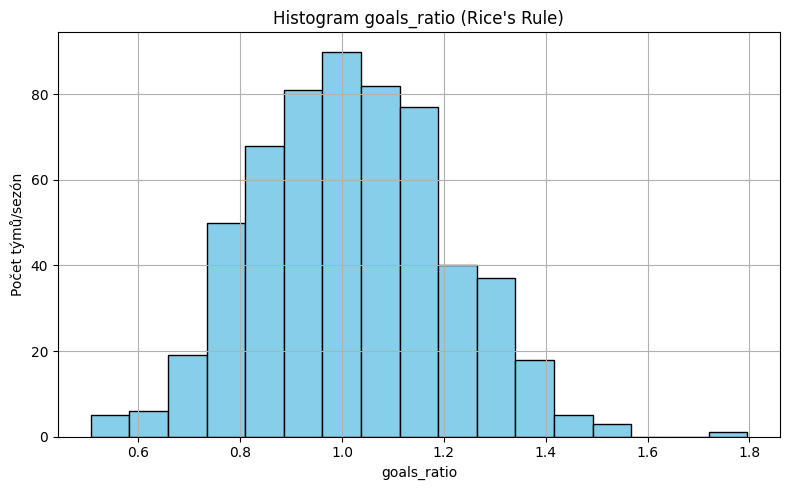

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Odstraníme prázdné hodnoty
valid_data = df["goals_ratio"].dropna()

# 2. Spočítáme počet hodnot
n = len(valid_data)

# 3. Riceovo pravidlo pro počet bins
bins_rice = int(2 * n ** (1/3))
# Zaokrouhlení nahoru bez knihovny math:
if 2 * n ** (1/3) != bins_rice:
    bins_rice += 1

# 4. Vykreslíme histogram
plt.figure(figsize=(8, 5))
plt.hist(valid_data, bins=bins_rice, color="skyblue", edgecolor="black")
plt.title("Histogram goals_ratio (Rice's Rule)")
plt.xlabel("goals_ratio")
plt.ylabel("Počet týmů/sezón")
plt.grid(True)
plt.tight_layout()
plt.show()

### Histogram of the variable using the square root rule

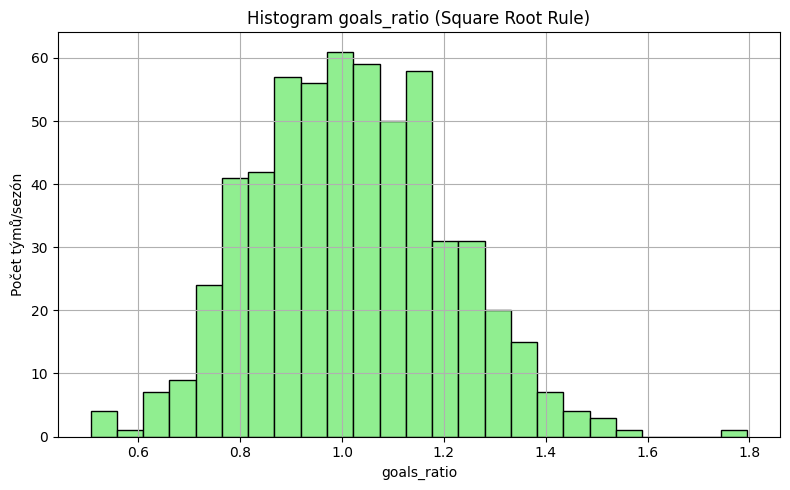

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Odstraníme prázdné hodnoty
valid_data = df["goals_ratio"].dropna()

# 2. Spočítáme počet hodnot
n = len(valid_data)

# 3. Počet bins podle odmocninového pravidla
bins_sqrt = int(n ** 0.5)
# Zaokrouhlení nahoru bez knihovny math
if n ** 0.5 != bins_sqrt:
    bins_sqrt += 1

# 4. Vykreslíme histogram
plt.figure(figsize=(8, 5))
plt.hist(valid_data, bins=bins_sqrt, color="lightgreen", edgecolor="black")
plt.title("Histogram goals_ratio (Square Root Rule)")
plt.xlabel("goals_ratio")
plt.ylabel("Počet týmů/sezón")
plt.grid(True)
plt.tight_layout()
plt.show()

# `victory_percentage`

Similar to the analysis of the variable `goals_ratio`, we will conduct an exploratory analysis of `victory_percentage` by following these steps:  
- Determine the basic descriptive statistics, such as the mean, median, standard deviation, minimum, and maximum.  
- Examine the distribution of the variable by using a histogram to better understand its characteristics.  
- Check if there are any obvious subgroups of teams within the variable under analysis that could be identified based on specific criteria, such as the range of the variable's values.

### Descriptive Statistics

In [24]:
# Odstraníme prázdné hodnoty, pokud nějaké jsou
valid_victory = df["victory_percentage"].dropna()

# Výpočet základních statistik
mean = valid_victory.mean()
median = valid_victory.median()
std = valid_victory.std()
minimum = valid_victory.min()
maximum = valid_victory.max()

# Výpis výsledků
print(f"Mean: {mean:.3f}")
print(f"Median: {median:.3f}")
print(f"Standard deviation: {std:.3f}")
print(f"Minimum: {minimum:.3f}")
print(f"Maximum: {maximum:.3f}")

Mean: 0.459
Median: 0.463
Standard deviation: 0.102
Minimum: 0.119
Maximum: 0.756


### Distribution

Here we will create the distribution of the variable, but we won't be doing it in two versions. Instead, we will choose a different, arbitrary number of intervals.

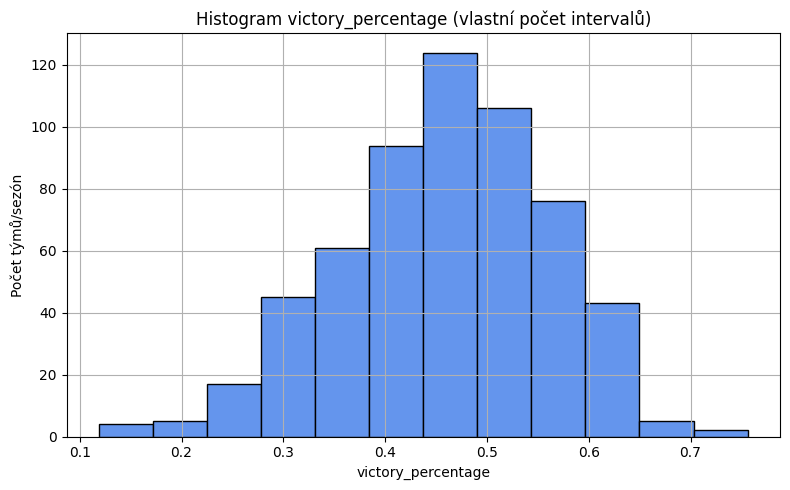

In [25]:
import matplotlib.pyplot as plt

# 1. Odstraníme prázdné hodnoty
valid_data = df["victory_percentage"].dropna()

# 2. Zvolíme libovolný počet intervalů (např. 12)
custom_bins = 12

# 3. Vykreslíme histogram
plt.figure(figsize=(8, 5))
plt.hist(valid_data, bins=custom_bins, color="cornflowerblue", edgecolor="black")
plt.title("Histogram victory_percentage (vlastní počet intervalů)")
plt.xlabel("victory_percentage")
plt.ylabel("Počet týmů/sezón")
plt.grid(True)
plt.tight_layout()
plt.show()


# `goals_ratio` vs `victory_percentage`

We have already analyzed `goals_ratio` and `victory_percentage` as two separate variables. Now, our task is to analyze them together to identify potential interdependencies between them.  
  
In this step, we will perform the following exercises:  
- Before starting the analysis, let’s consider whether these variables might be dependent or independent of each other. What kind of relationship can be expected based on their business descriptions?  
- We will create a scatterplot to visually represent the dependencies between these variables.  
- We will determine the relationship between the variables based on the scatterplot.  
- We will analyze the scatterplot to identify any outliers, paying special attention to their common distribution.

## Scatterplot of Variables

Now let's create a scatterplot for the two analyzed variables, `goals_ratio` and `victory_percentage`. After completing this step, let's answer the following questions:  
- What is the relationship between the variables `goals_ratio` and `victory_percentage`?  
- Can any outliers be identified in the plot? If so, what criteria were used to identify them?

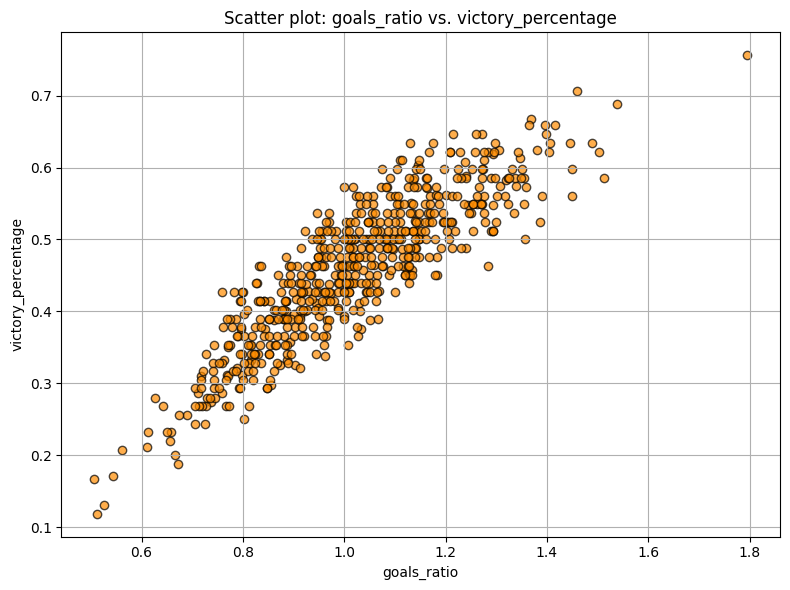

In [26]:
import matplotlib.pyplot as plt

# 1. Odstraníme prázdné hodnoty v obou sloupcích
valid_data = df.dropna(subset=["goals_ratio", "victory_percentage"])

# 2. Vykreslíme scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(valid_data["goals_ratio"], valid_data["victory_percentage"], color="darkorange", edgecolors="black", alpha=0.7)

# 3. Popisky a vzhled
plt.title("Scatter plot: goals_ratio vs. victory_percentage")
plt.xlabel("goals_ratio")
plt.ylabel("victory_percentage")
plt.grid(True)
plt.tight_layout()
plt.show()

> space for chart analysis notes

If we have identified outlying observations at an earlier stage of analysis, let's now examine these specific cases. We will focus on outliers concerning the variables `goals_ratio` and `victory_percentage` to understand what features distinguish them.

The following steps should be taken for analysis:
1. Identify the specific outlying observations that were detected earlier.
2. Analyze the characteristics of these observations, paying attention to their values for the variables `goals_ratio` and `victory_percentage`.
3. Try to understand what might have caused their outlying nature. Are these instances of anomalies, or could they be the result of natural fluctuations in the data?

# Summary

In this notebook, we conducted a basic exploratory analysis of our dataset. The data was cleaned and then enriched with new variables, which we subjected to further analysis. The final step of this part is to save the processed data to a CSV file.  
  
**Let's save our data frame to the file:** `data/processed/hockey_teams.csv`, using a semicolon (`;`) as the column separator.

Next, in the following phase of our work, we will propose betting odds based on the analyzed historical data and discuss the results of this analysis.

### Writing the frame to the target location

- file name: `data/processed/hockey_teams.csv`,
- column separator: `;`,
- remember to disable index saving.

In [52]:
df.to_csv("../data/processed/hockey_teams.csv", sep=";", index=False)

Zpětná vazba
- columns_to_analyze používáš dřív, než ho definuješ
- dvojnásobné importy a opakované výpočty -> lepší je zařadit importy na začátek a některé bloky používat jen jednou

Tipy k vizualizacím
- používat jednotný styl os a názvů

Jinak vše v pořádku. 